In [1]:
#importing all needed (and some I don't need) librarys

import pandas as pd
import matplotlib as plt
import numpy as np
import scipy
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sqlalchemy import create_engine
import pymysql

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\walke\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
new_header = df.iloc[0]

In [5]:
data = df[1:]

In [6]:
data.columns = new_header

In [7]:
data=data.drop_duplicates(subset='BILL_AMT1')

In [8]:
data=data.dropna(how = 'all')

In [9]:
data=data.sort_values(by="BILL_AMT1",ascending=False,na_position= 'first')

In [10]:
data.head(2398)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2398,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
330,150000,male,graduate school,1,40,2,2,2,2,2,...,104975,107147,109428,5200,0,8100,4000,4200,4200,not default
807,80000,female,university,2,23,1,-1,2,-1,-1,...,1145,7328,3703,6861,11,1146,7329,3704,426,not default
968,220000,female,graduate school,1,36,-1,-1,0,-1,-1,...,1057,990,1324,4102,1111,1057,990,1324,1039,not default
671,30000,female,university,2,34,2,-1,2,2,2,...,37075,37662,36904,33000,33000,5810,1325,0,3095,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,280000,female,university,1,39,1,-1,0,0,0,...,37154,32581,33316,38621,2000,1130,922,1011,5000,default
150,260000,female,graduate school,1,60,1,-2,-1,-1,-1,...,0,969,869,0,22500,0,969,1000,0,not default
27,60000,male,graduate school,2,27,1,-2,-1,-1,-1,...,-57,127,-189,0,1000,0,500,0,1000,default
110,360000,male,university,1,35,1,-2,-2,-2,-2,...,-103,-103,-103,0,0,0,0,0,0,not default


In [11]:
data = data.reset_index(drop=True)

In [12]:
data.head(2398)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,150000,male,graduate school,1,40,2,2,2,2,2,...,104975,107147,109428,5200,0,8100,4000,4200,4200,not default
2,80000,female,university,2,23,1,-1,2,-1,-1,...,1145,7328,3703,6861,11,1146,7329,3704,426,not default
3,220000,female,graduate school,1,36,-1,-1,0,-1,-1,...,1057,990,1324,4102,1111,1057,990,1324,1039,not default
4,30000,female,university,2,34,2,-1,2,2,2,...,37075,37662,36904,33000,33000,5810,1325,0,3095,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,280000,female,university,1,39,1,-1,0,0,0,...,37154,32581,33316,38621,2000,1130,922,1011,5000,default
2134,260000,female,graduate school,1,60,1,-2,-1,-1,-1,...,0,969,869,0,22500,0,969,1000,0,not default
2135,60000,male,graduate school,2,27,1,-2,-1,-1,-1,...,-57,127,-189,0,1000,0,500,0,1000,default
2136,360000,male,university,1,35,1,-2,-2,-2,-2,...,-103,-103,-103,0,0,0,0,0,0,not default


In [13]:
data=data.drop([0])

<AxesSubplot:xlabel='default payment next month', ylabel='Count'>

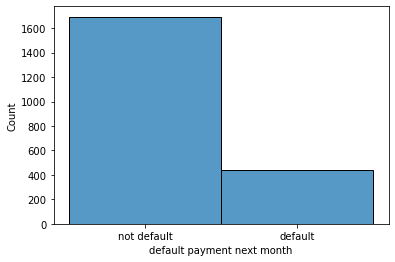

In [14]:
sns.histplot(data=data,x="default payment next month")

In [15]:
import sweetviz as sv

In [16]:
analysis = sv.analyze(data)
analysis.show_html('mtcars.html')

                                             |          | [  0%]   00:00 -> (? left)

Report mtcars.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 1 to 2137
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2137 non-null   object
 1   SEX                         2137 non-null   object
 2   EDUCATION                   2137 non-null   object
 3   MARRIAGE                    2137 non-null   object
 4   AGE                         2137 non-null   object
 5   PAY_0                       2137 non-null   object
 6   PAY_2                       2137 non-null   object
 7   PAY_3                       2137 non-null   object
 8   PAY_4                       2137 non-null   object
 9   PAY_5                       2137 non-null   object
 10  PAY_6                       2137 non-null   object
 11  BILL_AMT1                   2137 non-null   object
 12  BILL_AMT2                   2137 non-null   object
 13  BILL_AMT3                   2137 non-null   obje

In [18]:
data["LIMIT_BAL"]=data["LIMIT_BAL"].astype(int)
data["AGE"]=data["AGE"].astype(int)
data["BILL_AMT1"]=data["BILL_AMT1"].astype(int)
data["BILL_AMT2"]=data["BILL_AMT2"].astype(int)
data["BILL_AMT3"]=data["BILL_AMT3"].astype(int)                        
data["BILL_AMT4"]=data["BILL_AMT4"].astype(int)
data["BILL_AMT5"]=data["BILL_AMT5"].astype(int)      
data["BILL_AMT6"]=data["BILL_AMT6"].astype(int)  
data["PAY_AMT1"]=data["PAY_AMT1"].astype(int)
data["PAY_AMT2"]=data["PAY_AMT2"].astype(int)
data["PAY_AMT3"]=data["PAY_AMT3"].astype(int)                        
data["PAY_AMT4"]=data["PAY_AMT4"].astype(int)
data["PAY_AMT5"]=data["PAY_AMT5"].astype(int)      
data["PAY_AMT6"]=data["PAY_AMT6"].astype(int)              
data["SEX"]=data["SEX"].astype('category')
data["EDUCATION"]=data["EDUCATION"].astype('category')
data["MARRIAGE"]=data["MARRIAGE"].astype('category')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 1 to 2137
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   2137 non-null   int32   
 1   SEX                         2137 non-null   category
 2   EDUCATION                   2137 non-null   category
 3   MARRIAGE                    2137 non-null   category
 4   AGE                         2137 non-null   int32   
 5   PAY_0                       2137 non-null   object  
 6   PAY_2                       2137 non-null   object  
 7   PAY_3                       2137 non-null   object  
 8   PAY_4                       2137 non-null   object  
 9   PAY_5                       2137 non-null   object  
 10  PAY_6                       2137 non-null   object  
 11  BILL_AMT1                   2137 non-null   int32   
 12  BILL_AMT2                   2137 non-null   int32   
 13  BILL_AMT3         

In [20]:
data['MARRIAGE'] = data['MARRIAGE'].replace('1','Married')
data['MARRIAGE'] = data['MARRIAGE'].replace('2','Single')
data['MARRIAGE'] = data['MARRIAGE'].replace('3','Divorced')
data['MARRIAGE'] = data['MARRIAGE'].replace('0','Other')

In [21]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,150000,male,graduate school,Married,40,2,2,2,2,2,...,104975,107147,109428,5200,0,8100,4000,4200,4200,not default
2,80000,female,university,Single,23,1,-1,2,-1,-1,...,1145,7328,3703,6861,11,1146,7329,3704,426,not default
3,220000,female,graduate school,Married,36,-1,-1,0,-1,-1,...,1057,990,1324,4102,1111,1057,990,1324,1039,not default
4,30000,female,university,Single,34,2,-1,2,2,2,...,37075,37662,36904,33000,33000,5810,1325,0,3095,not default
5,320000,male,graduate school,Married,60,-1,-1,-1,-1,0,...,886,11741,4317,3465,84440,886,11533,4317,52466,default


In [22]:
analysis = sv.analyze(data)
analysis.show_html('mtcars.html')


                                             |          | [  0%]   00:00 -> (? left)

Report mtcars.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
